# DLCD itteration comparison tool 

This notebook is designed to detect change between different itterations of the DLCD, 
using as little compute power as posible.

as a result, this notebook dosn't have any images, however they can be easily generated from the xarrays found within

In [1]:
'''
landcover classification legend

number 	landcover type 
0	no data
1	Extraction Sites
3	Inland Waterbodies
4	Salt Lakes
5	Irrigated Cropping
6	Irrigated Pasture
7	Irrigated Sugar
8	Rainfed Cropping
9	Rainfed Pasutre
10	Rainfed Sugar
11	Wetlands
14	Tussock Grasses - Closed
15	Alpine Grasses - Open
16	Hummock Grasses - Open
18	Tussock Grasses - Open
19	Shrubs and Grasses - Sparse-Scattered
24	Shrubs - Closed
25	Shrubs - Open
31	Trees - Closed
32	Trees - Open
33	Trees - Scattered
34	Trees - Sparse
35	Built up area '''


'\nlandcover classification legend\n\nnumber \tlandcover type \n0\tno data\n1\tExtraction Sites\n3\tInland Waterbodies\n4\tSalt Lakes\n5\tIrrigated Cropping\n6\tIrrigated Pasture\n7\tIrrigated Sugar\n8\tRainfed Cropping\n9\tRainfed Pasutre\n10\tRainfed Sugar\n11\tWetlands\n14\tTussock Grasses - Closed\n15\tAlpine Grasses - Open\n16\tHummock Grasses - Open\n18\tTussock Grasses - Open\n19\tShrubs and Grasses - Sparse-Scattered\n24\tShrubs - Closed\n25\tShrubs - Open\n31\tTrees - Closed\n32\tTrees - Open\n33\tTrees - Scattered\n34\tTrees - Sparse\n35\tBuilt up area '

In [2]:
#load requiered modules 
import numpy as np
import rasterio
#from matplotlib import pyplot as plt #don't need unless want to plot
import xarray as xr
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
import os.path
from scipy import ndimage
from scipy.ndimage import measurements
from scipy import stats




In [3]:
#set up filepath due to folder re-arrangement 
os.chdir('/g/data/r78/ck9738')

In [4]:
cmap = mpl.colors.ListedColormap(['xkcd:black',
'xkcd:grey',
'xkcd:black',
'xkcd:medium blue',
'xkcd:robin egg blue',
'xkcd:plum',
'xkcd:pink purple',
'xkcd:raspberry',
'xkcd:old pink',
'xkcd:pale pink',
'xkcd:warm pink',
'xkcd:tealish',
'xkcd:black',
'xkcd:black',
'xkcd:pumpkin orange',
'xkcd:white',
'xkcd:yellow',
'xkcd:black',
'xkcd:apricot',
'xkcd:eggshell',
'xkcd:black',
'xkcd:black',
'xkcd:black',
'xkcd:black',
'xkcd:umber',
'xkcd:tan',
'xkcd:black',
'xkcd:black',
'xkcd:black',
'xkcd:black',
'xkcd:black',
'xkcd:deep green', 
'xkcd:medium green',
'xkcd:light sage',
'xkcd:slime green',
'xkcd:light grey'])

In [23]:
#load in geotifs using rasterio, trun into an xarray :
#enter filename as a string, include subfolders!!
#previous_version DLCD found in old_DLCD, new in new_DLCD.

#use this command to print a list of all file in respective folder : 

def load_gfif(file_name, x):
    #file_string = 'old_DLCD/'+file_name+'.tif'

    dataset = rasterio.open(file_name) #open using Raterio
    {i: dtype for i, dtype in zip(dataset.indexes, dataset.dtypes)}
    data_array = dataset.read(x) #read selected band into np array
    year_xr = xr.DataArray(data_array) #turn into Xr array for fuctionality #Now don't need xr yet
    return(year_xr) #return np array into program 
    


old_version = load_gfif('old_DLCD/DLCDv2_2010_20111.tif',1)#for old dlcd files all only have ONE band (are single year)

new_version = load_gfif('new_DLCD/DLCDv2_2016_new.tif',10)#for new DLCD band number corrosponds to year in following table

In [24]:
#small_new_a=new_version.isel(dim_0=slice(0,4967),dim_1=slice(0,6387))
#small_old_a=old_version.isel(dim_0=slice(0,4967),dim_1=slice(0,6387))

In [25]:
#small_new=new_version.isel(dim_0=slice(6000,8000),dim_1=slice(6000,8000))
#small_old=old_version.isel(dim_0=slice(6000,8000),dim_1=slice(6000,8000))

In [26]:
#new_version[ind_x, ind_y]

band number  year:

1   = 2001-2002

2   = 2002-2003

3   = 2003-2004

ect...

15  = 2015-2016


In [27]:
# define function to return the number of pixles occupied by the selected landcover type. 
"""
def count_type(in_xr, X):
    raw_np = np.ones_like(in_xr)
    raw_xr = xr.DataArray(raw_np)
    count_name = raw_xr.where(in_xr==X) #makes a xarray with just the selected class an nan values
    count_name = count_name.fillna(0) #replaces all the nan with 0
    howmuch_name = np.count_nonzero(count_name) #counts the number of non 0 in the xaray
    return(howmuch_name) #returns an int which is the number of pixles that exist of the specified LC class """
    

'\ndef count_type(in_xr, X):\n    raw_np = np.ones_like(in_xr)\n    raw_xr = xr.DataArray(raw_np)\n    count_name = raw_xr.where(in_xr==X) #makes a xarray with just the selected class an nan values\n    count_name = count_name.fillna(0) #replaces all the nan with 0\n    howmuch_name = np.count_nonzero(count_name) #counts the number of non 0 in the xaray\n    return(howmuch_name) #returns an int which is the number of pixles that exist of the specified LC class '

In [28]:
class_values = [19]

class_values_a = [3]

[1,
3,
4,
5,
6,
7,
8,
9,
10,
11,
14,
15,
16,
18,
19,
22,
24,
25,
31,
32,
33,
34,
35,]

In [29]:
# define function to return the number of pixles which are class A in old and class B in new:
#fuction returns an array, int: array with 1= occurance of class overlap and 0= everything else.

def count_overlap_array(old_np,A,new_np,B):
    raw_np = np.ones_like(old_np) #generate a np with the same size as the dlcd but full of 1 values
    raw_xr = xr.DataArray(raw_np) #turn to xarray for it's useful fuctionality
    count_old = raw_xr.where(old_np==A) # make an xr where 1= presance of class A, 0= absence 
    count_new = count_old.where(new_np==B) # make an xr where 1= overlap of classes A&B
    count_class = count_new.fillna(0) #replaces all the nan with 0
    howmuch_name = np.count_nonzero(count_class) #counts the number of non 0 in the xaray


    return(count_class) #returns an array


#create loop to populate matrix dict
for i in class_values_a:
    i_lable = str(i) #class names have to be integer so pandas will sort into numerical order
    
    for x in class_values:
        x_lable=str(x)
        if x == i:
            pass
            print('I passed: '+i_lable+' / '+x_lable)
            
        else:
            this_change = count_overlap_array(old_version ,i,new_version,x)
            if this_change.sum() > 0:
                labled_array, number_of_objects = measurements.label(this_change)
                name_point_list = np.unique(labled_array)
                list_of_points=measurements.center_of_mass(this_change,labled_array,name_point_list)
                output_list = [(b,a) for a,b in list_of_points]
                
                plot_name = i_lable+' to '+x_lable+'big_2014_comparison'
                fig, ax = plt.subplots(figsize=(40,40))
                plt.title(plot_name)
                plt.scatter(*zip(*output_list),c='r', s=60)
                ax.imshow(new_version, cmap)
                plt.savefig('output_images/'+plot_name+'.png')
                plt.close()


/g/data/v10/public/modules/agdc-py3-env/20171214/envs/agdc/lib/python3.6/site-packages/scipy/ndimage/measurements.py:1301: RuntimeWarning: invalid value encountered in true_divide
  for dir in range(input.ndim)]


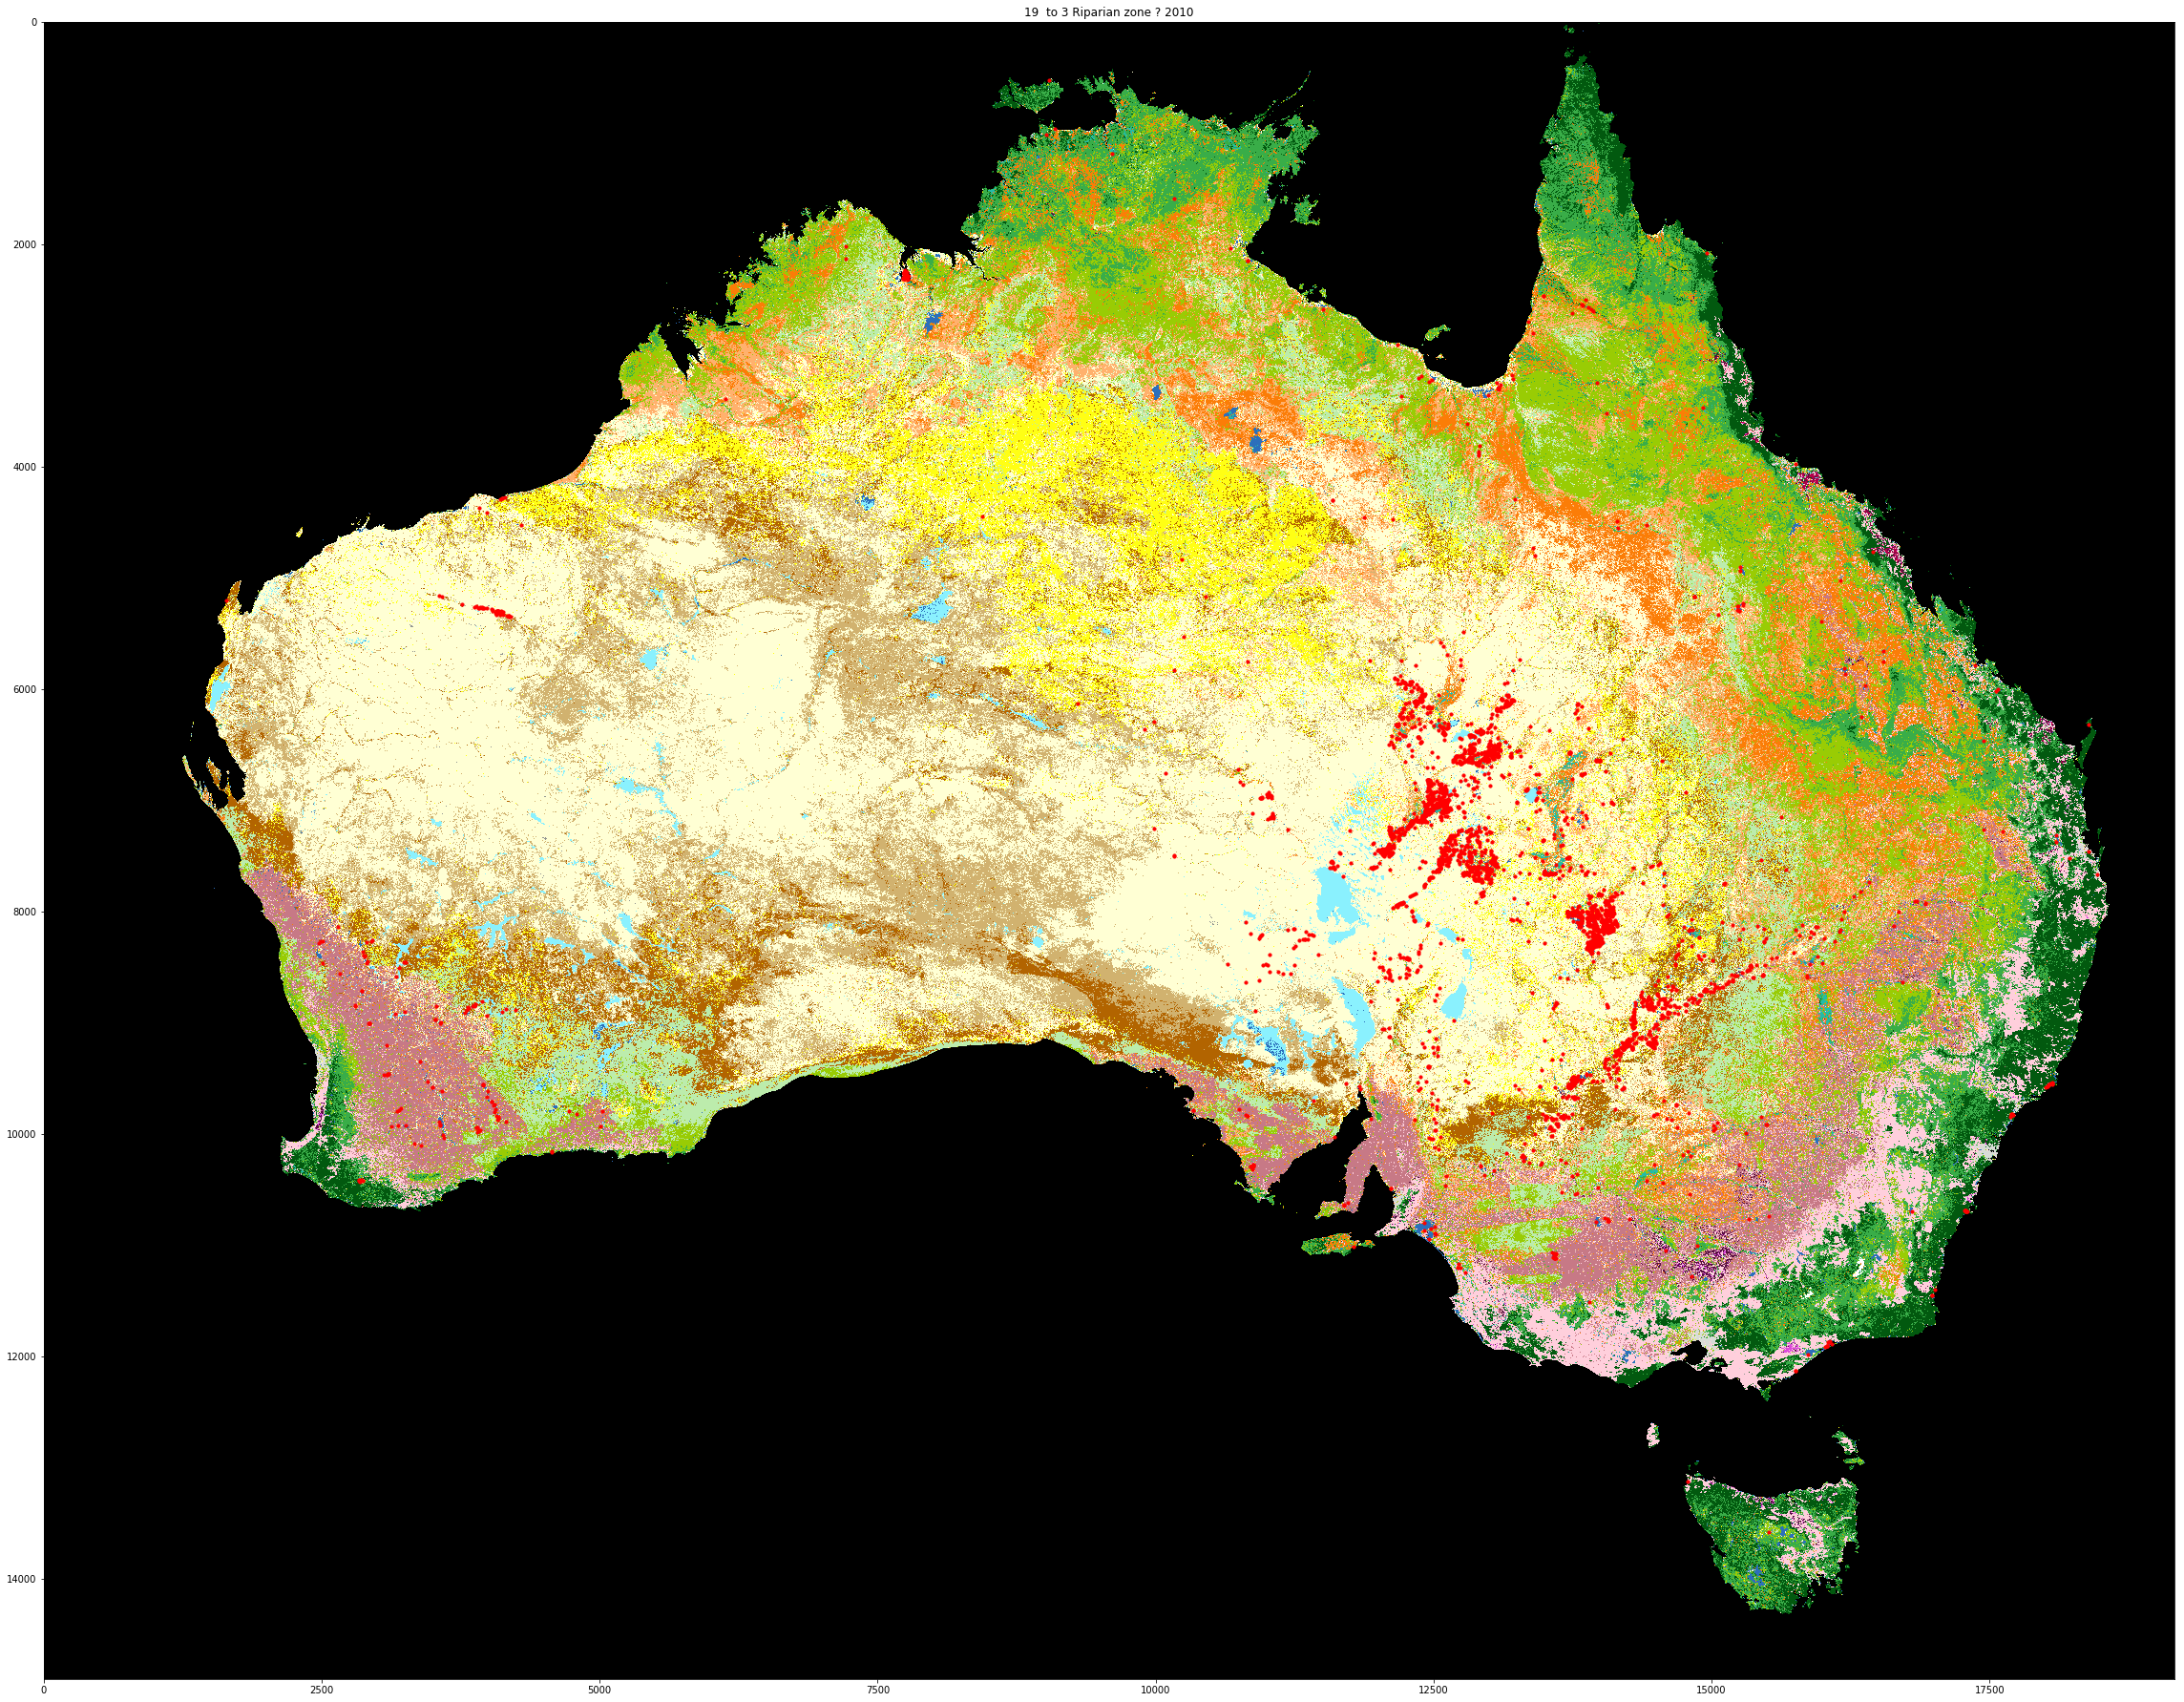

In [30]:
this_change = count_overlap_array(old_version ,19,new_version,3)
if this_change.sum() > 0:
    labled_array, number_of_objects = measurements.label(this_change)
    name_point_list = np.unique(labled_array)
    list_of_points=measurements.center_of_mass(this_change,labled_array,name_point_list)
    output_list = [(b,a) for a,b in list_of_points]
                
    plot_name = '19 '+' to '+'3 '+'Riparian zone ? 2010'
    fig, ax = plt.subplots(figsize=(40,40))
    plt.title(plot_name)
    plt.scatter(*zip(*output_list),c='r', s=10)
    ax.imshow(new_version, cmap)
    plt.savefig('output_images/'+plot_name+'.png')
    plt.show()
    plt.close()


this_change = count_overlap_array(small_old_a,34,small_new_a,x)
spot_list=cluster_create(this_change,3)#set limit to 3 or more pixles
plot_name = i_lable+' / '+x_lable+'areas of 3 or more change'
fig, ax = plt.subplots(figsize=(10,10))
plt.title(plot_name)
ax.imshow(small_new_a, cmap)
plt.scatter(*zip(*spot_list),c='r', s=600)
plt.savefig('output_images/'+plot_name+'.png')
plt.close()

print('added')

this_change = count_overlap_array(old_version,31,new_version,11)
if this_change.sum() > 0:
    labled_array, number_of_objects = measurements.label(this_change)
    name_point_list = np.unique(labled_array)
    list_of_points=measurements.center_of_mass(this_change,labled_array,name_point_list)
    output_list = [(b,a) for a,b in list_of_points]
    print(number_of_objects)
    print(output_list)
    print('y, X')
else:
    print('spot not_found')

            


name_point_list

plot_name = 'large change detection'
fig, ax = plt.subplots(figsize=(20,20))
plt.title(plot_name)
plt.scatter(*zip(*output_list),c='r', s=600)
ax.imshow(new_version, cmap='Blues')
plt.show()

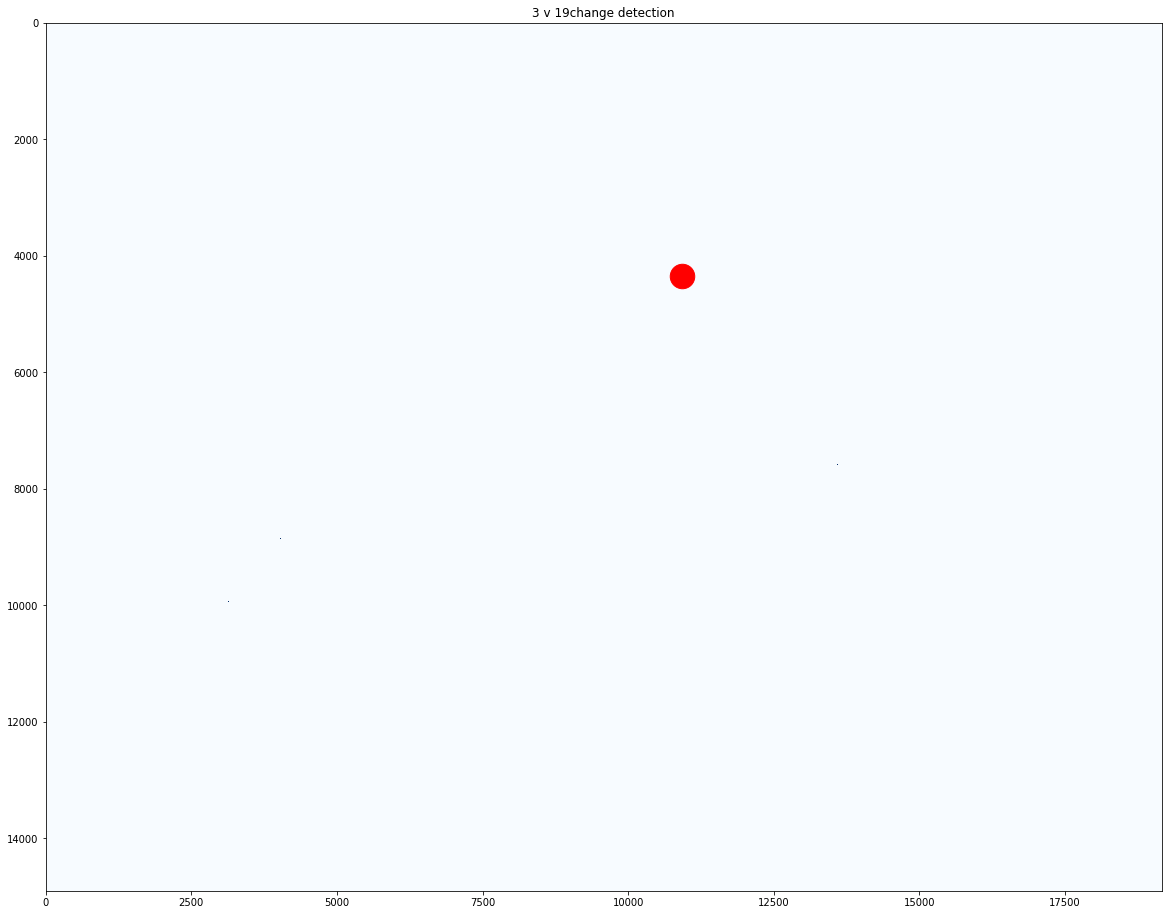

In [13]:
plot_name = i_lable+' v '+x_lable+'change detection'
fig, ax = plt.subplots(figsize=(20,20))
plt.title(plot_name)
plt.scatter(10920, 4348,c='r', s=600)
ax.imshow(this_change, cmap='Blues')
plt.show()


NameError: name 'small_new' is not defined

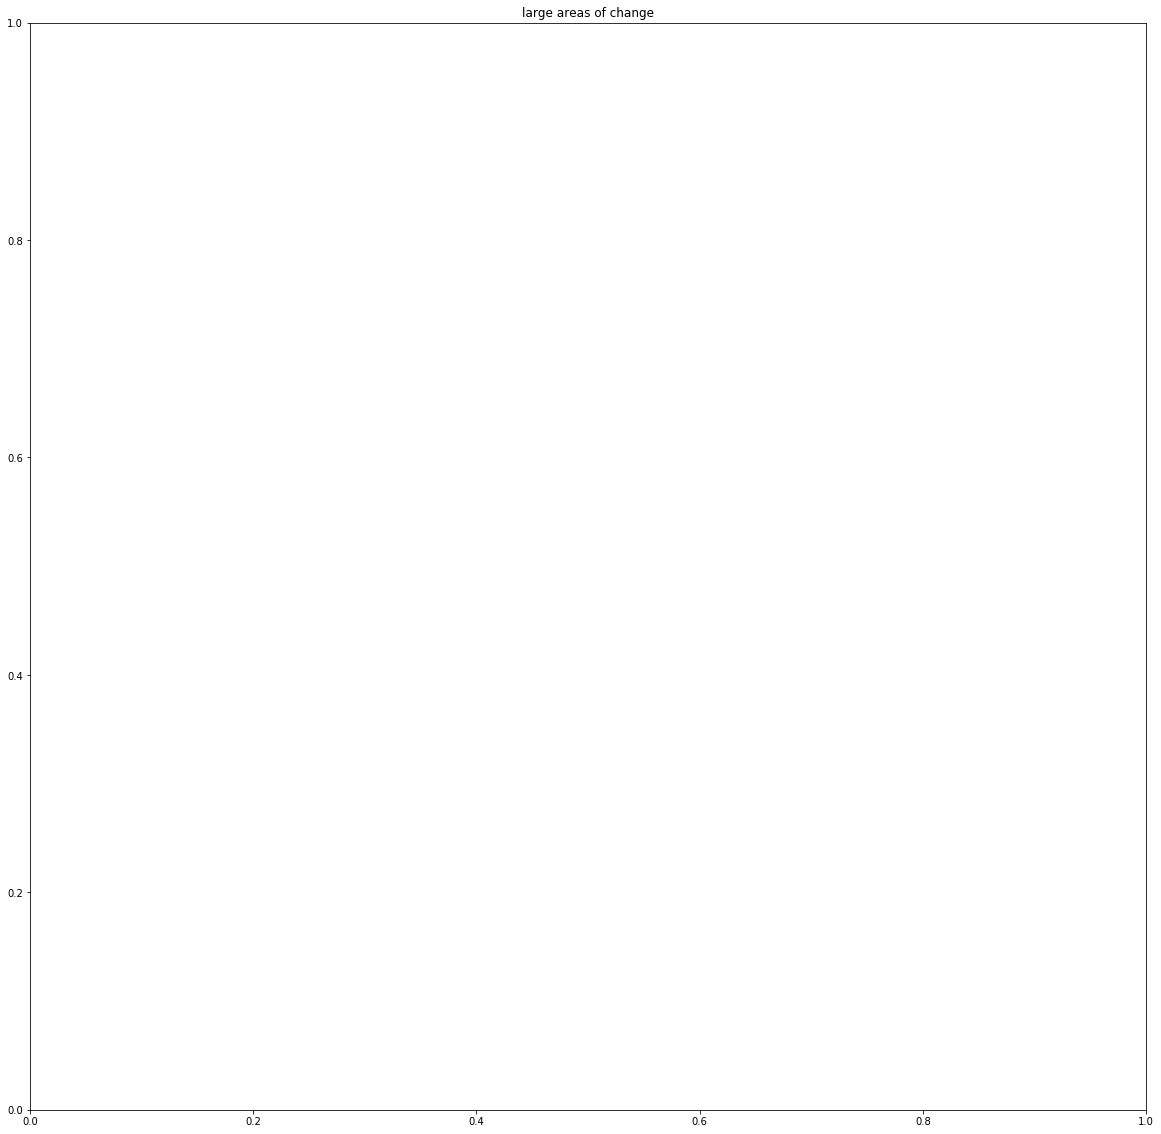

In [14]:
#plot occurance of clusters over the landcover map: 

fig, ax = plt.subplots(figsize=(20,20))
plt.title('large areas of change')
ax.imshow(small_new, cmap)
plt.scatter(*zip(*clump_grass2shrubs),c='r', s=600)

In [ ]:
#plot occurance of clusters over the landcover map: 

fig, ax = plt.subplots(figsize=(20,20))
plt.title('large areas of change')
ax.imshow(small_new, cmap)
plt.scatter(*zip(*clump_grass2shrubs),c='r', s=60)

In [ ]:
#matrix_dataframe = matrix_dataframe.sort_values(class_values, axis=0, ascending=True)

In [ ]:
#matrix_dataframe.to_csv('Matrixes/confustion_matrix_for_2005.csv')

In [ ]:
#alpine_grass = count_type(data_xr,15) #test for alpine grass, for 2001-2002 the value should be 13122
#alpine_grass

In [ ]:
#shrubs_grass = count_type(data_xr,19) #test for shrubs and grass - sparse-scattered, for 2001-2002 the value should be 45830808
#shrubs_grass

In [ ]:
#wetlands = count_type(data_xr,11) #test for wetlands, for 2001-2002 the value should be 140977
#wetlands